<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya (2348556)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/sem2/datasets/prog4.csv')
df

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00
...,...,...,...,...,...,...
2873,118,1456768752,16.7,1015.1,81.9,2016-03-01 01:59:12+08:00
2874,119,1456768823,16.7,1015.1,82.0,2016-03-01 02:00:23+08:00
2875,120,1456768873,16.7,1015.1,81.9,2016-03-01 02:01:13+08:00
2876,121,1456768932,16.7,1015.1,81.7,2016-03-01 02:02:12+08:00


In [ ]:
df.describe()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity
count,2878.000000,2.878000e+03,2878.000000,2878.000000,2878.000000
mean,719.000000,1.460520e+09,24.153648,1005.862543,80.653475
std,415.475606,3.715930e+06,4.925571,8.401371,22.736845
min,0.000000,1.456762e+09,14.800000,994.000000,40.000000
25%,359.250000,1.456805e+09,20.100000,997.300000,56.650000
50%,719.000000,1.460520e+09,26.000000,1010.500000,92.300000
75%,1078.750000,1.464235e+09,28.275000,1013.700000,100.000000
max,1438.000000,1.464278e+09,31.400000,1016.700000,100.000000


In [ ]:
df.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

In [ ]:
df=(df-df.mean(numeric_only=True))/df.std(numeric_only=True)
# df=(df-df.min(numeric_only=True))/(df.max(numeric_only=True)-df.min(numeric_only=True))

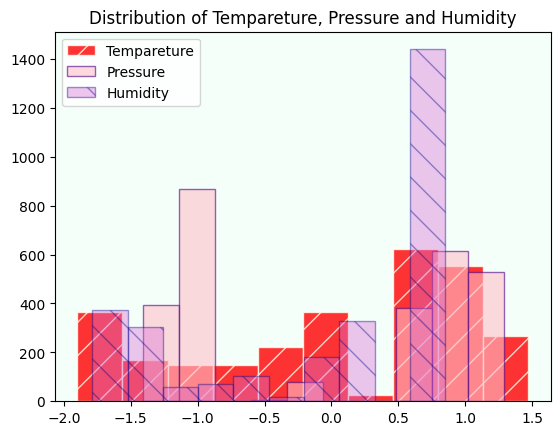

In [ ]:
pt.hist(df['Temperature'], color='red', edgecolor='ivory', alpha=0.8, hatch='/')
pt.hist(df['Pressure'], color='pink', edgecolor='indigo', alpha=0.6)
pt.hist(df['Humidity'], color='orchid', edgecolor='darkblue', alpha=0.4, hatch='\\')
pt.legend(['Tempareture', 'Pressure', 'Humidity'])
pt.title('Distribution of Tempareture, Pressure and Humidity')
ax = pt.gca()
ax.set_facecolor('mintcream')

In [ ]:
def permulit(x, y, test_size=0.2, random_seed=None):
    '''
    Split the dataset into training and testing sets.
    Parameters:
    - x: Features (list, array, or DataFrame)
    - y: Labels (list, array, or Series)
    - test_size: The proportion of the dataset to include in the test split (default is 0.2)
    - random_seed: Seed for random number generation to ensure reproducibility (default is None)

    Returns:
    - x_train, y_train, x_test, y_test
    '''
    assert len(x) == len(y),\
    'Input arrays x and y must have the same length (:'
    assert 0 < test_size < 1,\
    'test_size percentage should be a float between 0 and 1.'
    if random_seed:
      random.seed(random_seed)
    combined_data = list(zip(x, y))
    random.shuffle(combined_data)
    x_shuffled, y_shuffled = zip(*combined_data)
    split_index = int(len(x) * (1 - test_size))
    x_train, x_test = x_shuffled[:split_index], x_shuffled[split_index:]
    y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

Considering Temperature as precdictor(x) and Pressure as target(y).

In [ ]:
x = df['Temperature']
y = df['Pressure']

In [ ]:
tsp = [0.44, 0.3, 0.2] #test_size_percentage
model = LinearRegression()
track = []
print('Evaluating R2 scores...')
r2 = []
for i in tsp:
  print(f'\nTrained on {int((1-i)*100)}% of data.. Evaluated on {int(i*100)}% of data..')
  print('------------------------------------------------------')
  for j in range(1,7,1):
    x_train, y_train, x_test, y_test = permulit(x,y,test_size=i, random_seed=452134)
    p = PolynomialFeatures(degree=j,include_bias=True)
    x_train = p.fit_transform(x_train.reshape(-1,1))
    x_test = p.transform(x_test.reshape(-1,1))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    t = (i,j,r2_score(y_test, y_pred))
    track.append(t)
    print(f'At Degree {j}, the score is: ',t[2])

Evaluating R2 scores...

Trained on 56% of data.. Evaluated on 44% of data..
------------------------------------------------------
At Degree 1, the score is:  0.5754278554876
At Degree 2, the score is:  0.643761439133397
At Degree 3, the score is:  0.6636456731336089
At Degree 4, the score is:  0.7052892906540859
At Degree 5, the score is:  0.7183872509988776
At Degree 6, the score is:  0.7321909266194819

Trained on 70% of data.. Evaluated on 30% of data..
------------------------------------------------------
At Degree 1, the score is:  0.5724861275644748
At Degree 2, the score is:  0.6302638059132954
At Degree 3, the score is:  0.656698710301995
At Degree 4, the score is:  0.6945837970345599
At Degree 5, the score is:  0.7079133481546613
At Degree 6, the score is:  0.7256209498733235

Trained on 80% of data.. Evaluated on 20% of data..
------------------------------------------------------
At Degree 1, the score is:  0.5867410917486672
At Degree 2, the score is:  0.6377068454017198

In [ ]:
track = sorted(track, key = lambda x: x[2], reverse=True)
print('The top 9 models are -\n')
for i in range(9):
  print(f'{i+1}. Trained on {int((1-track[i][0])*100)}% of data..  Evaluated on {int(track[i][0]*100)}% of data..\
  At degree {track[i][1]}..  Achieved R2 score {track[i][2]:4f}')

The top 9 models are -

1. Trained on 80% of data..  Evaluated on 20% of data..  At degree 6..  Achieved R2 score 0.740895
2. Trained on 56% of data..  Evaluated on 44% of data..  At degree 6..  Achieved R2 score 0.732191
3. Trained on 70% of data..  Evaluated on 30% of data..  At degree 6..  Achieved R2 score 0.725621
4. Trained on 80% of data..  Evaluated on 20% of data..  At degree 5..  Achieved R2 score 0.719175
5. Trained on 56% of data..  Evaluated on 44% of data..  At degree 5..  Achieved R2 score 0.718387
6. Trained on 70% of data..  Evaluated on 30% of data..  At degree 5..  Achieved R2 score 0.707913
7. Trained on 80% of data..  Evaluated on 20% of data..  At degree 4..  Achieved R2 score 0.707432
8. Trained on 56% of data..  Evaluated on 44% of data..  At degree 4..  Achieved R2 score 0.705289
9. Trained on 70% of data..  Evaluated on 30% of data..  At degree 4..  Achieved R2 score 0.694584


If we only allow models with $R^2$ scores above $70$%, then just the top $5$ models can be considered further. Onward!

##Defining a custom class for visualization

In [ ]:
class visualize:
  def __init__(shila):
    pass
  def showme(shila, model, x_train, x_trainP, x_test, x_testP, y_train, y_test):
    fig, ax = pt.subplots(1,2, figsize=(10,4))
    ax[0].scatter(x_train[::10], y_train[::10], color='orchid')
    ax[0].scatter(x_train[::10], model.predict(x_trainP[::10]), color='snow', edgecolor='darkblue')
    ax[0].set_title('On Training data')
    ax[0].legend(['actual', 'predictions'])
    ax[0].set_xlabel('(taken at a frequency of 10)')
    ax[0].set_facecolor('papayawhip')
    ax[1].scatter(x_test[::5], y_test[::5], color='orchid')
    ax[1].scatter(x_test[::5], model.predict(x_testP[::5]), color='whitesmoke', edgecolor='navy')
    ax[1].set_title('On Testing data')
    ax[1].legend(['actual', 'predictions'])
    ax[1].set_xlabel('(taken at a frequency of 5)')
    ax[1].set_facecolor('mistyrose')
    fig.suptitle('Visualization of Model performance');
ob = visualize()

##The best model (trained on $80$% of data at degree $6$)

In [ ]:
x_train, y_train, x_test, y_test = permulit(x,y,test_size=0.2, random_seed=452134)
p = PolynomialFeatures(degree=6,include_bias=True)
x_trainP = p.fit_transform(x_train.reshape(-1,1))
x_testP = p.transform(x_test.reshape(-1,1))
model.fit(x_trainP, y_train)
y_pred = model.predict(x_testP)
print('The Mean Squared Error is: ', mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error is: ', mean_absolute_error(y_test, y_pred))

The Mean Squared Error is:  0.26008467717340544
The Mean Absolute Error is:  0.3723504589017456


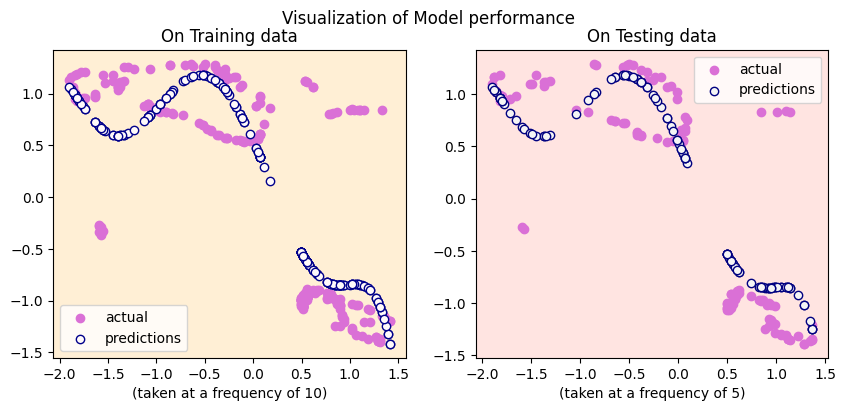

In [ ]:
ob.showme(model, x_train, x_trainP, x_test, x_testP, y_train, y_test)

##The second best model (Trained on $70$% of data at degree $6$)

In [ ]:
x_train, y_train, x_test, y_test = permulit(x,y,test_size=0.44, random_seed=452134)
p = PolynomialFeatures(degree=6,include_bias=True)
x_trainP = p.fit_transform(x_train.reshape(-1,1))
x_testP = p.transform(x_test.reshape(-1,1))
model.fit(x_trainP, y_train)
y_pred = model.predict(x_testP)
print('The Mean Squared Error is: ', mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error is: ', mean_absolute_error(y_test, y_pred))

The Mean Squared Error is:  0.27046665885992877
The Mean Absolute Error is:  0.38119633067080416


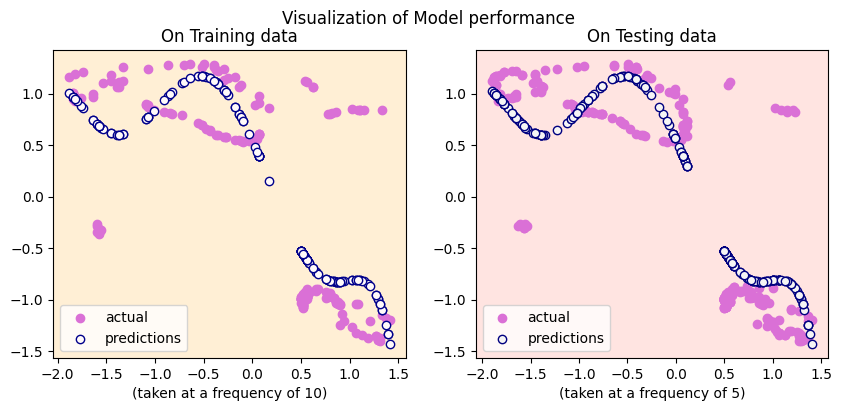

In [ ]:
ob.showme(model, x_train, x_trainP, x_test, x_testP, y_train, y_test)

##The third best model (Trained on $56$% of data at degree $6$)

In [ ]:
x_train, y_train, x_test, y_test = permulit(x,y,test_size=0.3, random_seed=452134)
p = PolynomialFeatures(degree=6,include_bias=True)
x_trainP = p.fit_transform(x_train.reshape(-1,1))
x_testP = p.transform(x_test.reshape(-1,1))
model.fit(x_trainP, y_train)
y_pred = model.predict(x_testP)
print('The Mean Squared Error is: ', mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error is: ', mean_absolute_error(y_test, y_pred))

The Mean Squared Error is:  0.2752656411982976
The Mean Absolute Error is:  0.3785040365898779


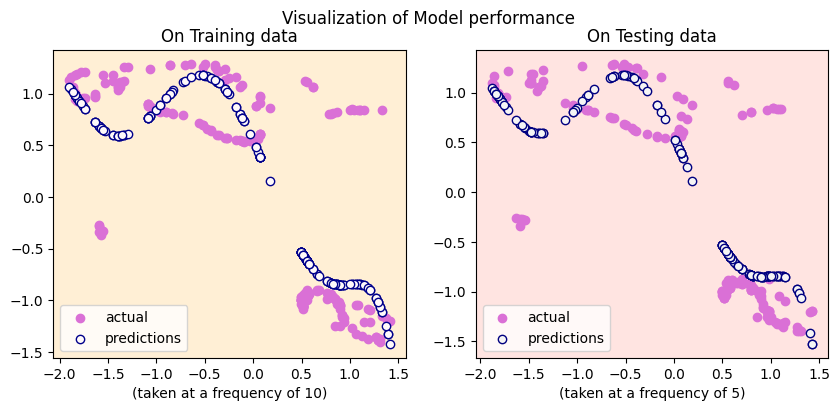

In [ ]:
ob.showme(model, x_train, x_trainP, x_test, x_testP, y_train, y_test)

##The fourth best model (Trained on $80$% of data at degree $5$)

In [ ]:
x_train, y_train, x_test, y_test = permulit(x,y,test_size=0.2, random_seed=452134)
p = PolynomialFeatures(degree=5,include_bias=True)
x_trainP = p.fit_transform(x_train.reshape(-1,1))
x_testP = p.transform(x_test.reshape(-1,1))
model.fit(x_trainP, y_train)
y_pred = model.predict(x_testP)
print('The Mean Squared Error is: ', mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error is: ', mean_absolute_error(y_test, y_pred))

The Mean Squared Error is:  0.28188694176908413
The Mean Absolute Error is:  0.4015821657680443


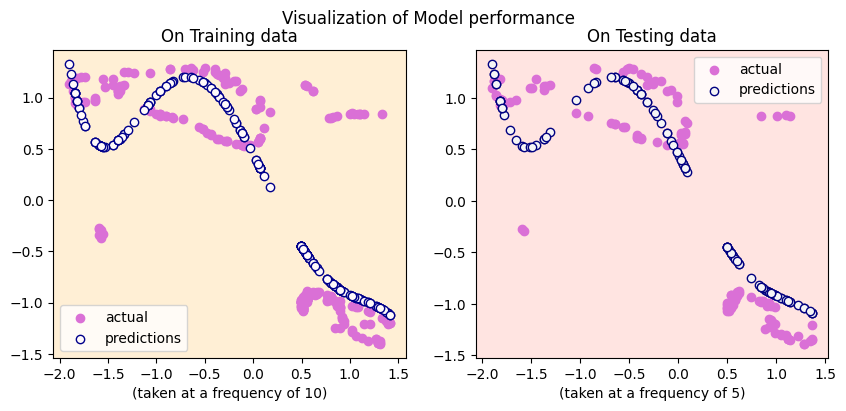

In [ ]:
ob.showme(model, x_train, x_trainP, x_test, x_testP, y_train, y_test)

##The fifth best model (Trained on $56$% of data at degree $5$)

In [ ]:
x_train, y_train, x_test, y_test = permulit(x,y,test_size=0.44, random_seed=452134)
p = PolynomialFeatures(degree=5,include_bias=True)
x_trainP = p.fit_transform(x_train.reshape(-1,1))
x_testP = p.transform(x_test.reshape(-1,1))
model.fit(x_trainP, y_train)
y_pred = model.predict(x_testP)
print('The Mean Squared Error is: ', mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error is: ', mean_absolute_error(y_test, y_pred))

The Mean Squared Error is:  0.28440731433498234
The Mean Absolute Error is:  0.4026386607755566


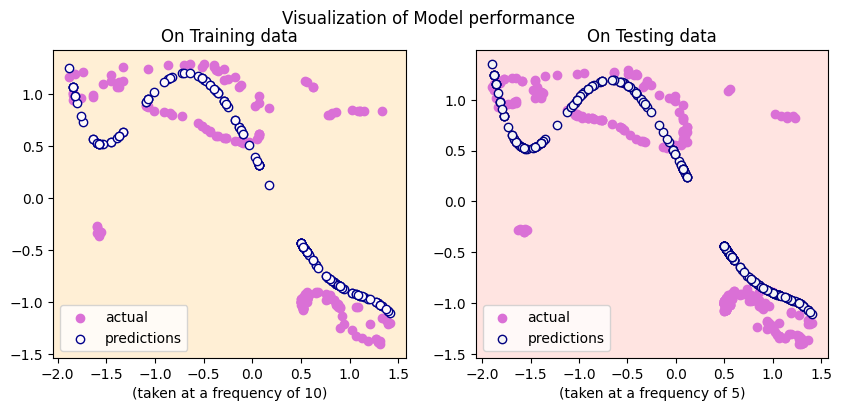

In [ ]:
ob.showme(model, x_train, x_trainP, x_test, x_testP, y_train, y_test)

##INFERENCE
From the first bar chart we can visualize the distribution of our predictor variables juxtaposed upon each other. Texture has been used for better contrast. To make this effective, we have first manually normalized the dataset with the numeric_only parameter set to True which saves us from some work of manually defining which columns need to be worked upon and which needs to be ignored (for example, strings and objects). Although negative skewness is observed in the distribution of humidity, we have not bothered since in the given question it was not asked to use it as predictor. Our real predictors, temperature and pressure do not need further prepocessing. Thus proceeding, we see that the 3 models that performed comparatively the best are those that all have degree 6 and are trained on 80%, 56% and 70% of data. This immediately assertains the fact that in polynomial regression, more the degree more is the strength of the regression. This is ofcourse because, as Weidman likes to term it, with more degree the model has more 'firepower'. This means that the number of extremas are increased and thus the model can turn at more points encompassing more non-linearity in the data. We also infer from the graph that is explanation works here because the given data is indeed not straight linear. If it was though, then simply using more 'firepower' would just overfit the model on the training data and cause it to perform poorly on the testing data with worse error rates. The code is pretty self explanatory all through. We have automated the process of defining, training and evaluating the models. We have also sorted the models from best to worst. A class called visualization is created which helps us to visualize the data without code repetition and puts reusability into effect. The clean visualizations thus produced for the top 5 models show the actual data points and the predictions of the model with appropiate key.
Note that the structure of the data tells us that polynomial regression may not be the best to be used in this case. We may consider some other strategy to increase the accuracy.